# Project: Dog vs Cat Classification

In [211]:
from pathlib import Path
import os
import torch
from torch import nn

In [212]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [213]:
data_path = Path("data/")
train_path = data_path / "train"
test_path = data_path / "test"

train_path, test_path

(WindowsPath('data/train'), WindowsPath('data/test'))

In [214]:
from PIL import Image
import random
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Cat, Shape: (406, 500, 3)')

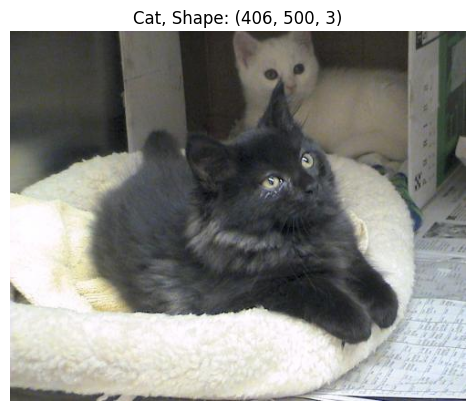

In [215]:
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
image_path_list = list(data_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)
img_is_array = np.asarray(img)

plt.imshow(img)
plt.axis(False)
plt.title(f"{image_class}, Shape: {img_is_array.shape}")

In [216]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [217]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [218]:
transformed_image = data_transform(img)
transformed_image

tensor([[[0.2039, 0.1961, 0.2039,  ..., 0.2196, 0.2157, 0.2078],
         [0.2706, 0.2196, 0.2118,  ..., 0.2392, 0.2314, 0.2235],
         [0.3412, 0.2667, 0.2235,  ..., 0.2471, 0.2431, 0.2314],
         ...,
         [0.8314, 0.8471, 0.8314,  ..., 0.5843, 0.5451, 0.5216],
         [0.8235, 0.8431, 0.8314,  ..., 0.3255, 0.2941, 0.2824],
         [0.6784, 0.6510, 0.6353,  ..., 0.2824, 0.2824, 0.2941]],

        [[0.2392, 0.2314, 0.2235,  ..., 0.2235, 0.2157, 0.2078],
         [0.3020, 0.2784, 0.2667,  ..., 0.2392, 0.2314, 0.2235],
         [0.3569, 0.3020, 0.2627,  ..., 0.2510, 0.2431, 0.2353],
         ...,
         [0.8784, 0.8902, 0.8745,  ..., 0.5725, 0.5490, 0.5216],
         [0.8627, 0.8824, 0.8706,  ..., 0.3216, 0.2941, 0.2784],
         [0.6941, 0.6706, 0.6549,  ..., 0.2824, 0.2824, 0.2902]],

        [[0.2157, 0.2118, 0.1961,  ..., 0.2039, 0.1961, 0.1922],
         [0.2667, 0.2314, 0.2118,  ..., 0.2196, 0.2235, 0.2157],
         [0.3255, 0.2745, 0.2275,  ..., 0.2314, 0.2314, 0.

Text(0.5, 1.0, 'Cat, Shape: torch.Size([3, 64, 64])')

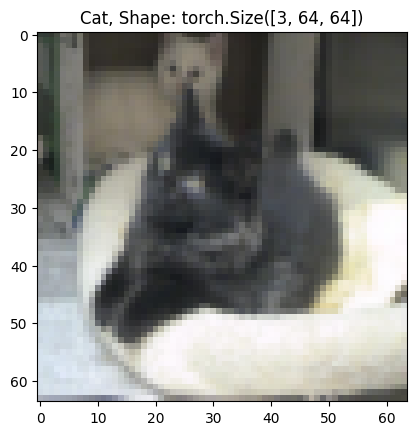

In [219]:
plt.imshow(transformed_image.permute(1, 2, 0))
plt.title(f"{image_class}, Shape: {transformed_image.shape}")

# Loading data using 'ImageFolder'

In [220]:
train_data = datasets.ImageFolder(root=train_path,
                                  transform=data_transform)

test_data = datasets.ImageFolder(root=test_path,
                                 transform=test_data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 12240
     Root location: data\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 2756
     Root location: data\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [221]:
# Get class names as list
class_names = train_data.classes
class_names

['Cat', 'Dog']

In [222]:
# Get class names as dictionary 
class_dict = train_data.class_to_idx
class_dict

{'Cat': 0, 'Dog': 1}

In [223]:
len(train_data), len(test_data)

(12240, 2756)

# Turn loaded images into 'DataLoader'

In [224]:
BATCH_SIZE = 32
NUM_WORKERS = 0

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1fb7f0922b0>,
 <torch.utils.data.dataloader.DataLoader at 0x1fb6805e190>)

In [225]:
img_custom, label_custom = next(iter(train_dataloader))

img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [226]:
class DogVsCat(nn.Module):
    def __init__(self, input_shape, hidden_layers, output_shape):
        super().__init__()

        self.conv_block_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_layers,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Conv2d(in_channels=hidden_layers,
                      out_channels=hidden_layers * 2,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers*2),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.conv_block_layer_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_layers*2,
                      out_channels=hidden_layers*2*2,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers*2*2),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Conv2d(in_channels=hidden_layers*2*2,
                      out_channels=hidden_layers*2*2*2,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers*2*2*2),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.classification = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_layers*16*16*8,
                      #out_features=output_shape
                      out_features=128),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(128, output_shape)
        )

    def forward(self, x):
        #print(f"Shape: {x.shape}")
        x = self.conv_block_layer_1(x)
        #print(f"Shape: {x.shape}")
        x = self.conv_block_layer_2(x)
        #print(f"Shape: {x.shape}")
        x = self.classification(x)
        #print(f"Shape: {x.shape}")
        return x
        

In [227]:
model_0 = DogVsCat(input_shape=3, hidden_layers=16, output_shape=1).to(device)
model_0

DogVsCat(
  (conv_block_layer_1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_layer_2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6):

In [228]:
# Setup loss function and optimizer
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

loss_fn, optimizer

(BCEWithLogitsLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     weight_decay: 0
 ))

In [229]:
# Check the correct shape on dummy tensor
dummy_input = torch.randn(32, 3, 64, 64)
output = model_0(dummy_input.to(device))
output

tensor([[ 0.6306],
        [ 0.8363],
        [ 0.3890],
        [ 0.7737],
        [ 0.2967],
        [ 0.7535],
        [ 0.5714],
        [-0.0546],
        [ 0.5994],
        [ 0.5752],
        [ 0.9271],
        [-0.0654],
        [-0.9602],
        [ 0.1342],
        [ 0.6178],
        [ 0.9840],
        [ 0.2864],
        [ 0.0738],
        [-0.0372],
        [ 0.6303],
        [ 0.2501],
        [ 0.3466],
        [-0.0366],
        [ 0.4988],
        [ 0.2233],
        [ 0.3044],
        [ 0.9327],
        [ 0.1469],
        [ 0.3619],
        [ 0.6967],
        [ 0.1416],
        [ 0.7433]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [230]:
from tqdm import tqdm
import time

In [231]:
epochs = 1

start_time = time.time()

results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}

for epoch in tqdm(range(epochs)):

    model_0.train()
    train_loss, train_acc = 0, 0
    
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)

        y = y.unsqueeze(dim=1).float()
        
        y_pred = model_0(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        y_pred_class = (torch.sigmoid(y_pred) > 0.5).float()
        train_acc += (y_pred_class==y).sum().item() / len(y_pred)

    train_loss /= len(train_dataloader)
    train_acc = (train_acc / len(train_dataloader)) * 100
    
    model_0.eval()
    test_loss, test_acc = 0, 0
    
    with torch.inference_mode():
        for batch, (X, y) in enumerate(test_dataloader):
            X, y = X.to(device), y.to(device)

            y = y.unsqueeze(dim=1).float()
        
            test_pred = model_0(X)

            loss = loss_fn(test_pred, y)
            test_loss += loss.item()

            test_pred_class = (torch.sigmoid(test_pred) > 0.5).float()
            test_acc += (test_pred_class==y).sum().item() / len(test_pred)
    
        test_loss /= len(test_dataloader)
        test_acc = (test_acc / len(test_dataloader)) * 100

    print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f} | Test Loss: {test_loss}, Test Accuracy: {test_acc}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
    


end_time = time.time()
train_time = end_time - start_time

print(f"Total time: {train_time}")

100%|██████████| 1/1 [00:32<00:00, 32.82s/it]

Epoch: 0 | Train Loss: 0.8353, Train Accuracy: 55.21 | Test Loss: 0.683969361343603, Test Accuracy: 54.525862068965516
Total time: 32.82099628448486


# Plot model_0 results

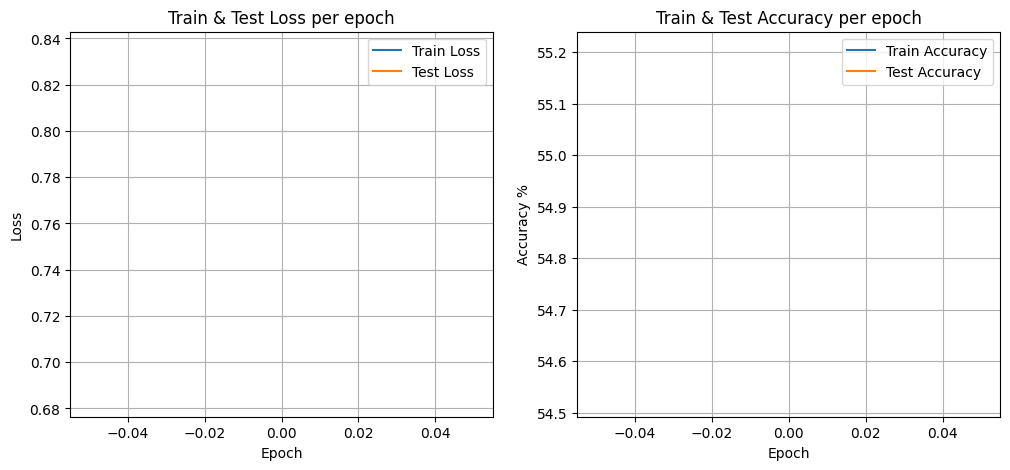

In [232]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), results["train_loss"], label="Train Loss")
plt.plot(range(epochs), results["test_loss"], label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train & Test Loss per epoch")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), results["train_acc"], label="Train Accuracy")
plt.plot(range(epochs), results["test_acc"], label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.title("Train & Test Accuracy per epoch")
plt.legend()
plt.grid()



In [233]:
print(len(results["train_loss"]), len(results["test_loss"]))
print(len(results["train_acc"]), len(results["test_acc"]))

1 1
1 1


In [234]:
# Build train and test function to make training easier
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim,
               device=device):

    train_loss, correct_preds, total_samples = 0, 0, 0
    model.train()

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y = y.unsqueeze(dim=1).float()
        
        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
        
        y_pred_class = (torch.sigmoid(y_pred) > 0.5).float()
        #train_acc += (y_pred_class==y).sum().item() / len(y_pred)
        correct_preds += (y_pred_class == y).sum().item()
        total_samples += y.size(0)

    train_loss /= len(dataloader)
    #train_acc = (train_acc / len(dataloader)) * 100
    train_acc = (correct_preds / total_samples) * 100
    
    return train_loss, train_acc

In [235]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):

    test_loss, correct_preds, total_samples = 0, 0, 0
    model.eval()
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            y = y.unsqueeze(dim=1).float()
        
            test_pred = model(X)

            loss = loss_fn(test_pred, y)
            test_loss += loss.item()

            test_pred_class = (torch.sigmoid(test_pred) > 0.5).float()
            #test_acc += (test_pred_class==y).sum().item() / len(test_pred)
            correct_preds += (test_pred_class == y).sum().item()
            total_samples += y.size(0)
    
    test_loss /= len(dataloader)
    #test_acc = (test_acc / len(dataloader)) * 100
    test_acc = (correct_preds / total_samples) * 100
    return test_loss, test_acc

# Augmentation data

In [236]:
train_data_transform_augmentation = transforms.Compose([
    #transforms.Resize(size=(64, 64)),
    transforms.RandomResizedCrop(size=(64, 64), scale=(0.9, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=25),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.05),
    #transforms.RandomAffine(degrees=15, translate=(1, 1)),
    #transforms.TrivialAugmentWide(num_magnitude_bins=31), # used to differentiate the data
    transforms.GaussianBlur(kernel_size=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

test_data = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])
train_data_transform_augmentation, test_data

(Compose(
     RandomResizedCrop(size=(64, 64), scale=(0.9, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
     RandomHorizontalFlip(p=0.5)
     RandomRotation(degrees=[-25.0, 25.0], interpolation=nearest, expand=False, fill=0)
     ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.05, 0.05))
     GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 2.0))
     ToTensor()
     Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
 ),
 Compose(
     Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
     ToTensor()
     Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
 ))

In [237]:
train_data_augmentation = datasets.ImageFolder(root=train_path,
                                               transform=train_data_transform_augmentation)
test_data_augmentation = datasets.ImageFolder(root=test_path,
                                              transform=test_data)

train_data_augmentation, test_data_augmentation

(Dataset ImageFolder
     Number of datapoints: 12240
     Root location: data\train
     StandardTransform
 Transform: Compose(
                RandomResizedCrop(size=(64, 64), scale=(0.9, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
                RandomHorizontalFlip(p=0.5)
                RandomRotation(degrees=[-25.0, 25.0], interpolation=nearest, expand=False, fill=0)
                ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.05, 0.05))
                GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 2.0))
                ToTensor()
                Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
            ),
 Dataset ImageFolder
     Number of datapoints: 2756
     Root location: data\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.

In [238]:
BATCH_SIZE = 64
NUM_WORKERS = 4

train_dataloader_augmentation = DataLoader(dataset=train_data_augmentation,
                                           batch_size=BATCH_SIZE,
                                           num_workers=NUM_WORKERS,
                                           shuffle=True)

test_dataloader_augmentation = DataLoader(dataset=test_data_augmentation,
                                          batch_size=BATCH_SIZE,
                                          num_workers=NUM_WORKERS,
                                          shuffle=False)

train_dataloader_augmentation, test_dataloader_augmentation

(<torch.utils.data.dataloader.DataLoader at 0x1fb7aa1fbb0>,
 <torch.utils.data.dataloader.DataLoader at 0x1fb7aa1fcd0>)

In [239]:
len(class_names)

2

In [240]:
model_1 = DogVsCat(input_shape=3, hidden_layers=8, output_shape=1).to(device)
model_1

DogVsCat(
  (conv_block_layer_1): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_layer_2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU

In [241]:
# Setup loss function and optimizer
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001, weight_decay=0.001)
                             #lr=0.00025)
#optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01, momentum=0.9)
loss_fn, optimizer

(BCEWithLogitsLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     weight_decay: 0.001
 ))

In [242]:
# Train model_1 on augmentation data
epochs = 50

start_time = time.time()

results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}

for epoch in tqdm(range(epochs)):

    train_loss, train_acc = train_step(model=model_1,
               dataloader=train_dataloader_augmentation,
               loss_fn=loss_fn,
               optimizer=optimizer)

    test_loss, test_acc = test_step(model=model_1,
              dataloader=test_dataloader_augmentation,
              loss_fn=loss_fn)

    print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f} | Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
    


end_time = time.time()
train_time = end_time - start_time

print(f"Total time: {train_time}")

  2%|▏         | 1/50 [00:47<38:42, 47.40s/it]

Epoch: 0 | Train Loss: 0.7764, Train Accuracy: 54.56 | Test Loss: 0.6771, Test Accuracy: 56.71


  4%|▍         | 2/50 [01:47<43:40, 54.59s/it]

Epoch: 1 | Train Loss: 0.6760, Train Accuracy: 55.88 | Test Loss: 0.6635, Test Accuracy: 60.96


  6%|▌         | 3/50 [02:33<39:48, 50.81s/it]

Epoch: 2 | Train Loss: 0.6667, Train Accuracy: 57.33 | Test Loss: 0.6512, Test Accuracy: 62.74


  8%|▊         | 4/50 [03:20<37:47, 49.29s/it]

Epoch: 3 | Train Loss: 0.6618, Train Accuracy: 58.67 | Test Loss: 0.6309, Test Accuracy: 64.22


 10%|█         | 5/50 [04:09<36:57, 49.27s/it]

Epoch: 4 | Train Loss: 0.6517, Train Accuracy: 61.12 | Test Loss: 0.6183, Test Accuracy: 70.43


 12%|█▏        | 6/50 [04:58<36:02, 49.15s/it]

Epoch: 5 | Train Loss: 0.6427, Train Accuracy: 61.90 | Test Loss: 0.6274, Test Accuracy: 67.24


 14%|█▍        | 7/50 [05:45<34:47, 48.55s/it]

Epoch: 6 | Train Loss: 0.6333, Train Accuracy: 63.01 | Test Loss: 0.6304, Test Accuracy: 64.48


 16%|█▌        | 8/50 [06:32<33:39, 48.08s/it]

Epoch: 7 | Train Loss: 0.6258, Train Accuracy: 64.13 | Test Loss: 0.6168, Test Accuracy: 69.27


 18%|█▊        | 9/50 [07:19<32:37, 47.74s/it]

Epoch: 8 | Train Loss: 0.6118, Train Accuracy: 65.86 | Test Loss: 0.5953, Test Accuracy: 69.88


 20%|██        | 10/50 [08:06<31:38, 47.47s/it]

Epoch: 9 | Train Loss: 0.6166, Train Accuracy: 66.19 | Test Loss: 0.5785, Test Accuracy: 74.42


 22%|██▏       | 11/50 [08:53<30:42, 47.24s/it]

Epoch: 10 | Train Loss: 0.5969, Train Accuracy: 68.04 | Test Loss: 0.5782, Test Accuracy: 71.23


 24%|██▍       | 12/50 [09:40<29:58, 47.32s/it]

Epoch: 11 | Train Loss: 0.5868, Train Accuracy: 69.27 | Test Loss: 0.5437, Test Accuracy: 75.65


 26%|██▌       | 13/50 [10:32<29:54, 48.50s/it]

Epoch: 12 | Train Loss: 0.5786, Train Accuracy: 69.98 | Test Loss: 0.5437, Test Accuracy: 74.71


 28%|██▊       | 14/50 [11:19<28:53, 48.14s/it]

Epoch: 13 | Train Loss: 0.5694, Train Accuracy: 70.35 | Test Loss: 0.5618, Test Accuracy: 72.97


 30%|███       | 15/50 [12:06<27:50, 47.73s/it]

Epoch: 14 | Train Loss: 0.5582, Train Accuracy: 70.97 | Test Loss: 0.5380, Test Accuracy: 74.96


 32%|███▏      | 16/50 [13:01<28:15, 49.86s/it]

Epoch: 15 | Train Loss: 0.5520, Train Accuracy: 71.95 | Test Loss: 0.4937, Test Accuracy: 78.63


 34%|███▍      | 17/50 [13:57<28:31, 51.87s/it]

Epoch: 16 | Train Loss: 0.5373, Train Accuracy: 73.05 | Test Loss: 0.5175, Test Accuracy: 76.89


 36%|███▌      | 18/50 [14:50<27:52, 52.28s/it]

Epoch: 17 | Train Loss: 0.5229, Train Accuracy: 73.66 | Test Loss: 0.4803, Test Accuracy: 78.85


 38%|███▊      | 19/50 [15:41<26:45, 51.78s/it]

Epoch: 18 | Train Loss: 0.5211, Train Accuracy: 74.69 | Test Loss: 0.4707, Test Accuracy: 79.03


 40%|████      | 20/50 [16:33<25:59, 51.97s/it]

Epoch: 19 | Train Loss: 0.5150, Train Accuracy: 74.98 | Test Loss: 0.5111, Test Accuracy: 75.33


 42%|████▏     | 21/50 [17:24<24:52, 51.47s/it]

Epoch: 20 | Train Loss: 0.5135, Train Accuracy: 75.55 | Test Loss: 0.4632, Test Accuracy: 81.17


 44%|████▍     | 22/50 [18:18<24:24, 52.29s/it]

Epoch: 21 | Train Loss: 0.4980, Train Accuracy: 76.41 | Test Loss: 0.4405, Test Accuracy: 81.17


 46%|████▌     | 23/50 [19:10<23:30, 52.23s/it]

Epoch: 22 | Train Loss: 0.4890, Train Accuracy: 76.96 | Test Loss: 0.4379, Test Accuracy: 80.73


 48%|████▊     | 24/50 [20:01<22:26, 51.78s/it]

Epoch: 23 | Train Loss: 0.4897, Train Accuracy: 77.17 | Test Loss: 0.4219, Test Accuracy: 81.02


 50%|█████     | 25/50 [20:53<21:37, 51.89s/it]

Epoch: 24 | Train Loss: 0.4909, Train Accuracy: 77.01 | Test Loss: 0.4338, Test Accuracy: 81.28


 52%|█████▏    | 26/50 [21:51<21:27, 53.66s/it]

Epoch: 25 | Train Loss: 0.4788, Train Accuracy: 77.31 | Test Loss: 0.4562, Test Accuracy: 78.88


 54%|█████▍    | 27/50 [22:46<20:47, 54.26s/it]

Epoch: 26 | Train Loss: 0.4711, Train Accuracy: 77.86 | Test Loss: 0.4216, Test Accuracy: 81.68


 56%|█████▌    | 28/50 [23:37<19:30, 53.20s/it]

Epoch: 27 | Train Loss: 0.4688, Train Accuracy: 78.01 | Test Loss: 0.4455, Test Accuracy: 79.03


 58%|█████▊    | 29/50 [24:30<18:35, 53.11s/it]

Epoch: 28 | Train Loss: 0.4627, Train Accuracy: 79.23 | Test Loss: 0.4191, Test Accuracy: 81.71


 60%|██████    | 30/50 [25:22<17:33, 52.67s/it]

Epoch: 29 | Train Loss: 0.4602, Train Accuracy: 78.94 | Test Loss: 0.3869, Test Accuracy: 83.42


 62%|██████▏   | 31/50 [26:15<16:43, 52.80s/it]

Epoch: 30 | Train Loss: 0.4611, Train Accuracy: 78.88 | Test Loss: 0.4087, Test Accuracy: 82.69


 64%|██████▍   | 32/50 [27:09<15:58, 53.24s/it]

Epoch: 31 | Train Loss: 0.4515, Train Accuracy: 79.13 | Test Loss: 0.4220, Test Accuracy: 82.26


 66%|██████▌   | 33/50 [28:02<15:06, 53.31s/it]

Epoch: 32 | Train Loss: 0.4498, Train Accuracy: 79.53 | Test Loss: 0.4262, Test Accuracy: 81.13


 68%|██████▊   | 34/50 [28:56<14:15, 53.48s/it]

Epoch: 33 | Train Loss: 0.4550, Train Accuracy: 79.31 | Test Loss: 0.3933, Test Accuracy: 83.16


 70%|███████   | 35/50 [29:50<13:23, 53.57s/it]

Epoch: 34 | Train Loss: 0.4515, Train Accuracy: 79.60 | Test Loss: 0.3928, Test Accuracy: 83.74


 72%|███████▏  | 36/50 [30:44<12:30, 53.60s/it]

Epoch: 35 | Train Loss: 0.4417, Train Accuracy: 79.89 | Test Loss: 0.3680, Test Accuracy: 84.98


 74%|███████▍  | 37/50 [31:37<11:33, 53.38s/it]

Epoch: 36 | Train Loss: 0.4411, Train Accuracy: 80.01 | Test Loss: 0.3866, Test Accuracy: 82.76


 76%|███████▌  | 38/50 [32:29<10:35, 52.95s/it]

Epoch: 37 | Train Loss: 0.4331, Train Accuracy: 80.74 | Test Loss: 0.3924, Test Accuracy: 82.98


 78%|███████▊  | 39/50 [33:21<09:42, 52.94s/it]

Epoch: 38 | Train Loss: 0.4348, Train Accuracy: 80.14 | Test Loss: 0.4126, Test Accuracy: 81.35


 80%|████████  | 40/50 [34:17<08:57, 53.74s/it]

Epoch: 39 | Train Loss: 0.4361, Train Accuracy: 80.55 | Test Loss: 0.4680, Test Accuracy: 77.10


 82%|████████▏ | 41/50 [35:10<08:01, 53.51s/it]

Epoch: 40 | Train Loss: 0.4291, Train Accuracy: 80.56 | Test Loss: 0.3636, Test Accuracy: 85.01


 84%|████████▍ | 42/50 [36:02<07:03, 52.99s/it]

Epoch: 41 | Train Loss: 0.4258, Train Accuracy: 80.73 | Test Loss: 0.3887, Test Accuracy: 82.87


 86%|████████▌ | 43/50 [36:54<06:09, 52.83s/it]

Epoch: 42 | Train Loss: 0.4271, Train Accuracy: 80.98 | Test Loss: 0.4035, Test Accuracy: 81.93


 88%|████████▊ | 44/50 [37:49<05:20, 53.45s/it]

Epoch: 43 | Train Loss: 0.4212, Train Accuracy: 81.01 | Test Loss: 0.3577, Test Accuracy: 84.83


 90%|█████████ | 45/50 [38:43<04:27, 53.58s/it]

Epoch: 44 | Train Loss: 0.4207, Train Accuracy: 80.93 | Test Loss: 0.3626, Test Accuracy: 84.80


 92%|█████████▏| 46/50 [39:37<03:34, 53.67s/it]

Epoch: 45 | Train Loss: 0.4175, Train Accuracy: 81.32 | Test Loss: 0.3717, Test Accuracy: 84.11


 94%|█████████▍| 47/50 [40:31<02:41, 53.89s/it]

Epoch: 46 | Train Loss: 0.4225, Train Accuracy: 81.03 | Test Loss: 0.3642, Test Accuracy: 84.83


 96%|█████████▌| 48/50 [41:23<01:46, 53.28s/it]

Epoch: 47 | Train Loss: 0.4185, Train Accuracy: 81.70 | Test Loss: 0.3753, Test Accuracy: 82.69


 98%|█████████▊| 49/50 [42:15<00:52, 52.90s/it]

Epoch: 48 | Train Loss: 0.4123, Train Accuracy: 81.25 | Test Loss: 0.3661, Test Accuracy: 85.16


100%|██████████| 50/50 [43:08<00:00, 51.76s/it]

Epoch: 49 | Train Loss: 0.4148, Train Accuracy: 81.14 | Test Loss: 0.3871, Test Accuracy: 83.45
Total time: 2588.1687421798706


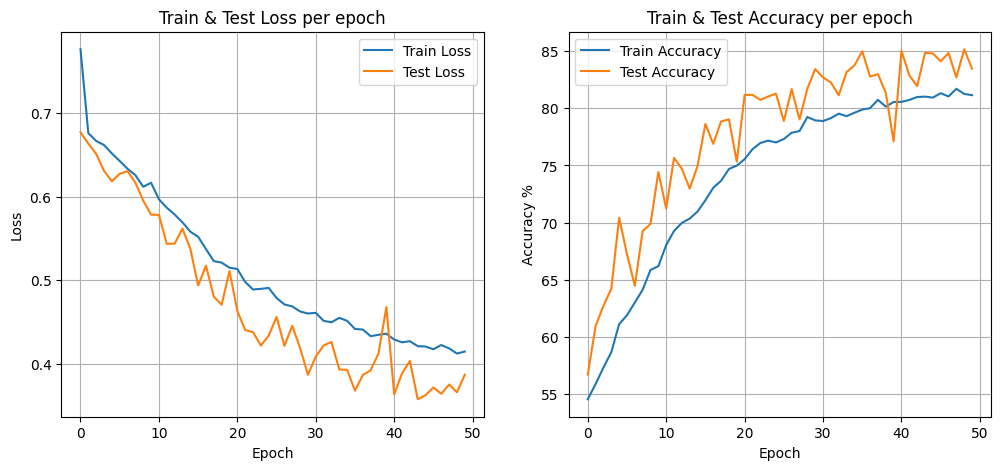

In [243]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), results["train_loss"], label="Train Loss")
plt.plot(range(epochs), results["test_loss"], label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train & Test Loss per epoch")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), results["train_acc"], label="Train Accuracy")
plt.plot(range(epochs), results["test_acc"], label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.title("Train & Test Accuracy per epoch")
plt.legend()
plt.grid()

In [244]:
from torch.utils.data import Subset

In [245]:
train_100_images = Subset(train_data_augmentation, range(100))
test_20_images = Subset(test_data_augmentation, range(20))

len(train_100_images), len(test_20_images)

(100, 20)